## Omdena Chapter: Algeria
### Green Algeria Project Building an Intelligent Control System for greenhouses


<b> <h4> Dataset: <a href="https://www.kaggle.com/datasets/piantic/autonomous-greenhouse-challengeagc-2nd-2019">  Autonomous Greenhouse Challenge(AGC) 2019~2020 - 2nd Edition </a> </h4> </b>
<br>

Content : 
<br>
<table style="width:70%">
    <tr>
        <th style="width:30%"> File Name </th>
        <th style="width:70%"> Description </th>
    </tr>
    <tr>
        <td> Weather + Greenhouse-Climate </td>
        <td> outdoor and indoor greenhouse climate, irrigation, status of actuators,<br> requested and realized climate setpoints </td>
    </tr>
    <tr>
        <td> <b> Resource </b></td>
        <td> <b> Resource Consumption</b> </td>
    </tr>
    <tr>
        <td> Production </td>
        <td> Harvest </td>
    </tr>
    <tr>
        <td> Crop-Production </td>
        <td> Crop-related parameters </td>
    </tr>
    <tr>
        <td> TomQuality </td>
        <td> Tomato Quality </td>
    </tr>
    <tr>
        <td> LabAnalysis </td>
        <td> Analysis of irrigation and drain samples </td>
    </tr>
    <tr>
        <td> Grodan-Sens </td>
        <td> Root-zone/slab information </td>
    </tr>
</table>


In [1]:
# This file covers the harvest analysis Greenhouse
# The weather & internal climates are covered in separate file

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
path = ("../Dataset")
os.listdir(path)

['AICU',
 'Automatoes',
 'Digilog',
 'Economics.pdf',
 'IUACAAS',
 'ReadMe.pdf',
 'Reference',
 'TheAutomators',
 'Weather']

In [4]:
files = ['AICU', 'Automatoes', 'Digilog', 'IUACAAS', 'Reference', 'TheAutomators']

## Crop Parameter

In [5]:
df = {}
for file in files:
    df[file] = pd.read_csv("../Dataset/"+file+"/CropParameters.csv")

In [6]:
for i in df:
    df[i].info()
    print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   %Time        23 non-null     int64  
 1   Stem_elong   23 non-null     object 
 2   Stem_thick   18 non-null     float64
 3   Cum_trusses  18 non-null     float64
 4   stem_dens    23 non-null     float64
 5   plant_dens   23 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   %Time        23 non-null     int64  
 1   Stem_elong   23 non-null     object 
 2   Stem_thick   18 non-null     float64
 3   Cum_trusses  18 non-null     float64
 4   stem_dens    23 non-null     float64
 5   plant_dens   23 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ KB

In [7]:
for i in df:
    print(i,"\n",df[i].head(),"\n")
    

AICU 
    %Time Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0  43823       18.7         8.3          NaN         3.6         1.8
1  43830       29.9        11.7          1.3         3.6         1.8
2  43838       35.8        13.6          3.2         3.6         1.8
3  43845       35.1        13.5          4.7         3.6         1.8
4  43852       34.7        12.6          5.8         3.6         1.8 

Automatoes 
    %Time Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0  43823       14.5         8.1          NaN         3.9        1.95
1  43830       29.5        10.8          1.3         3.9        1.95
2  43838       37.4        12.8          3.0         3.9        1.95
3  43845         34        12.5          4.7         3.9        1.95
4  43852       34.7        10.9          5.9         3.9        1.95 

Digilog 
    %Time Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0  43823         15         8.0          NaN         2.6         1.3


In [8]:
for i in df:
    df[i]['%Time'] = pd.to_datetime(df[i]['%Time'], unit='d',origin='1899-12-30')


In [9]:
col = df['AICU'].columns
col = col[1:]

In [10]:
for i in df:
    print(df[i].isnull().sum())
    print("")

%Time          0
Stem_elong     0
Stem_thick     5
Cum_trusses    5
stem_dens      0
plant_dens     0
dtype: int64

%Time          0
Stem_elong     0
Stem_thick     5
Cum_trusses    5
stem_dens      0
plant_dens     0
dtype: int64

%Time          0
Stem_elong     0
Stem_thick     5
Cum_trusses    5
stem_dens      0
plant_dens     0
dtype: int64

%Time          0
Stem_elong     0
Stem_thick     5
Cum_trusses    5
stem_dens      0
plant_dens     0
dtype: int64

%Time          0
Stem_elong     0
Stem_thick     5
Cum_trusses    5
stem_dens      1
plant_dens     0
dtype: int64

%Time          0
Stem_elong     0
Stem_thick     5
Cum_trusses    5
stem_dens      0
plant_dens     0
dtype: int64



In [11]:
#as the given data is in time-series format therefor interpolating the data with nearest member to remove null values

for i in df:
    for j in col:
        df[i][j] = df[i][j].astype(str).astype(float)

for i in df:
    df[i] = df[i].fillna(df[i].mean())  
  

C:\Users\vivek\AppData\Local\Temp\ipykernel_14724\2623652833.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[i] = df[i].fillna(df[i].mean())


In [12]:
for i in df:
    df[i].info()
    print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   %Time        23 non-null     datetime64[ns]
 1   Stem_elong   23 non-null     float64       
 2   Stem_thick   23 non-null     float64       
 3   Cum_trusses  23 non-null     float64       
 4   stem_dens    23 non-null     float64       
 5   plant_dens   23 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.2 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   %Time        23 non-null     datetime64[ns]
 1   Stem_elong   23 non-null     float64       
 2   Stem_thick   23 non-null     float64       
 3   Cum_trusses  23 non-null     float64       
 4   stem_dens    23 non-null     float64       
 

In [13]:
for i in df:
    print(i,"\n",df[i].head(),"\n")

AICU 
        %Time  Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0 2019-12-24        18.7         8.3    12.516667         3.6         1.8
1 2019-12-31        29.9        11.7     1.300000         3.6         1.8
2 2020-01-08        35.8        13.6     3.200000         3.6         1.8
3 2020-01-15        35.1        13.5     4.700000         3.6         1.8
4 2020-01-22        34.7        12.6     5.800000         3.6         1.8 

Automatoes 
        %Time  Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0 2019-12-24        14.5         8.1    12.694444         3.9        1.95
1 2019-12-31        29.5        10.8     1.300000         3.9        1.95
2 2020-01-08        37.4        12.8     3.000000         3.9        1.95
3 2020-01-15        34.0        12.5     4.700000         3.9        1.95
4 2020-01-22        34.7        10.9     5.900000         3.9        1.95 

Digilog 
        %Time  Stem_elong  Stem_thick  Cum_trusses  stem_dens   plant_dens
0 20

In [14]:
for i in df:
    print(i,"\n",df[i].describe(),"\n")

AICU 
        Stem_elong  Stem_thick  Cum_trusses  stem_dens     plant_dens
count   23.000000   23.000000    23.000000   23.000000  2.300000e+01
mean    31.511111   11.316667    12.516667    4.030435  1.800000e+00
std      5.374763    1.062266     5.905872    0.459679  6.811050e-16
min     14.000000    8.300000     1.300000    3.600000  1.800000e+00
25%     30.550000   11.050000     8.650000    3.600000  1.800000e+00
50%     31.511111   11.316667    12.516667    3.600000  1.800000e+00
75%     35.000000   11.550000    16.500000    4.500000  1.800000e+00
max     36.500000   13.600000    22.000000    4.500000  1.800000e+00 

Automatoes 
        Stem_elong  Stem_thick  Cum_trusses  stem_dens     plant_dens
count   23.000000   23.000000    23.000000   23.000000  2.300000e+01
mean    33.594444   10.838889    12.694444    4.747826  1.950000e+00
std      5.067586    1.068618     6.091982    0.988396  6.811050e-16
min     14.500000    8.100000     1.300000    3.900000  1.950000e+00
25%     33.3

C:\Users\vivek\AppData\Local\Temp\ipykernel_14724\1218934350.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  g = sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG")


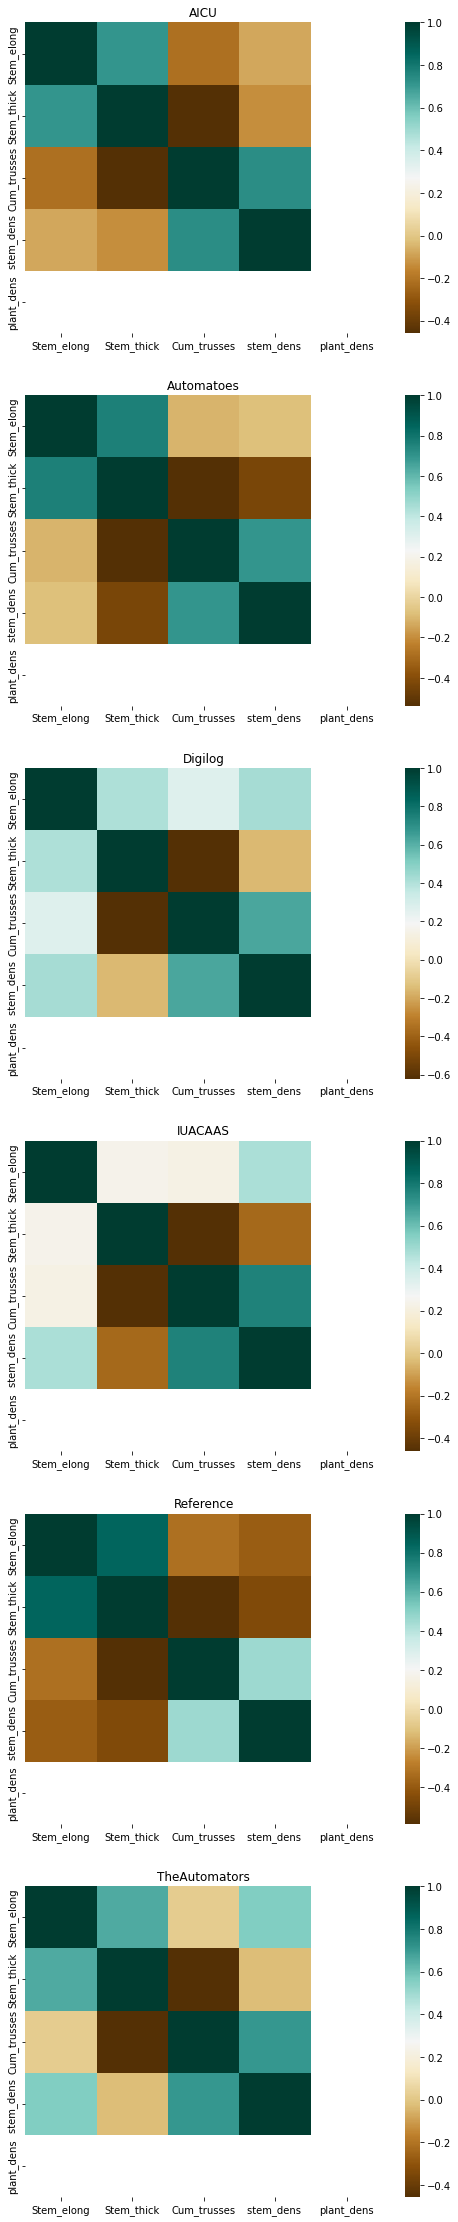

In [15]:
from pandas.plotting import scatter_matrix
k=0
plt.figure(figsize=(8,40))
for i in df:
    df_corr = df[i].corr()
    plt.subplot(6, 1, k + 1)
    g = sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=np.bool), cmap = "BrBG")
    plt.title(i)
    k=k+1
plt.show()

<Figure size 432x432 with 0 Axes>

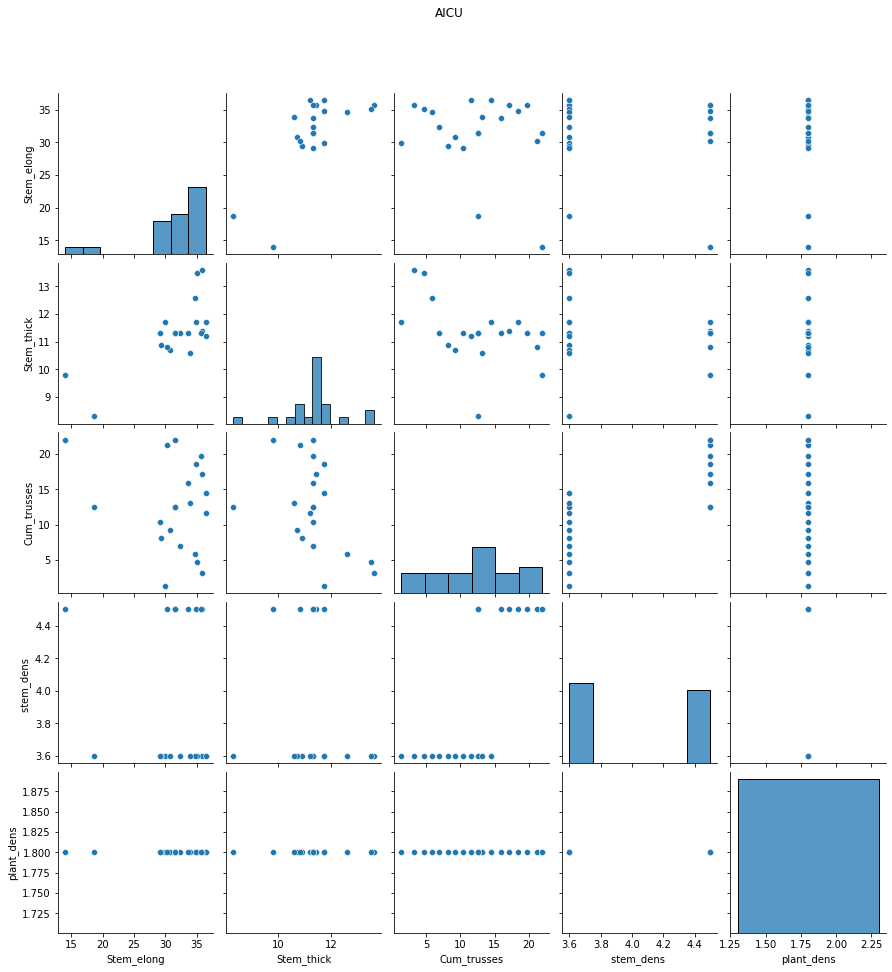

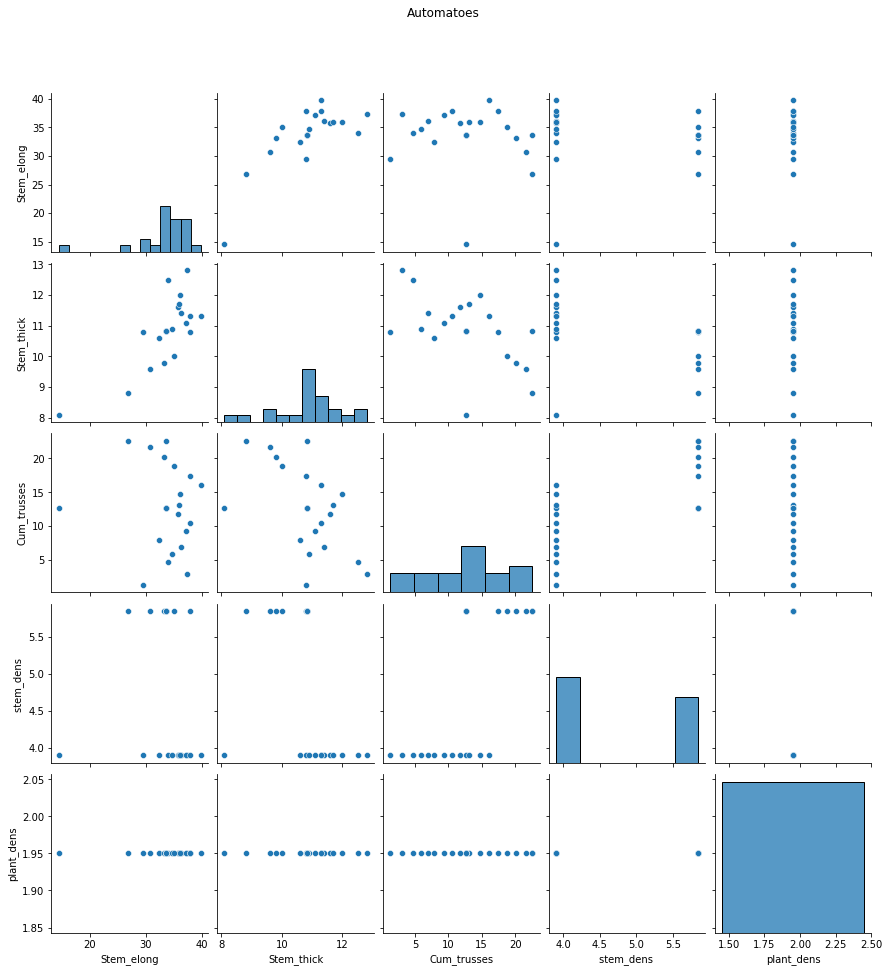

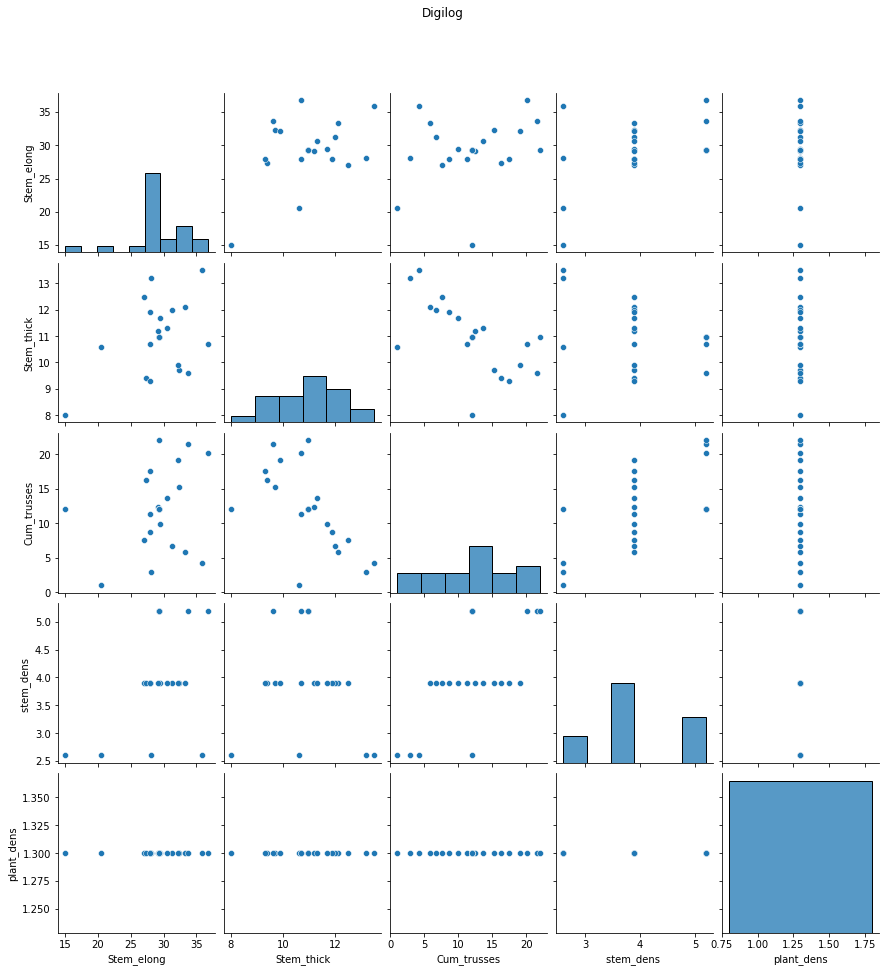

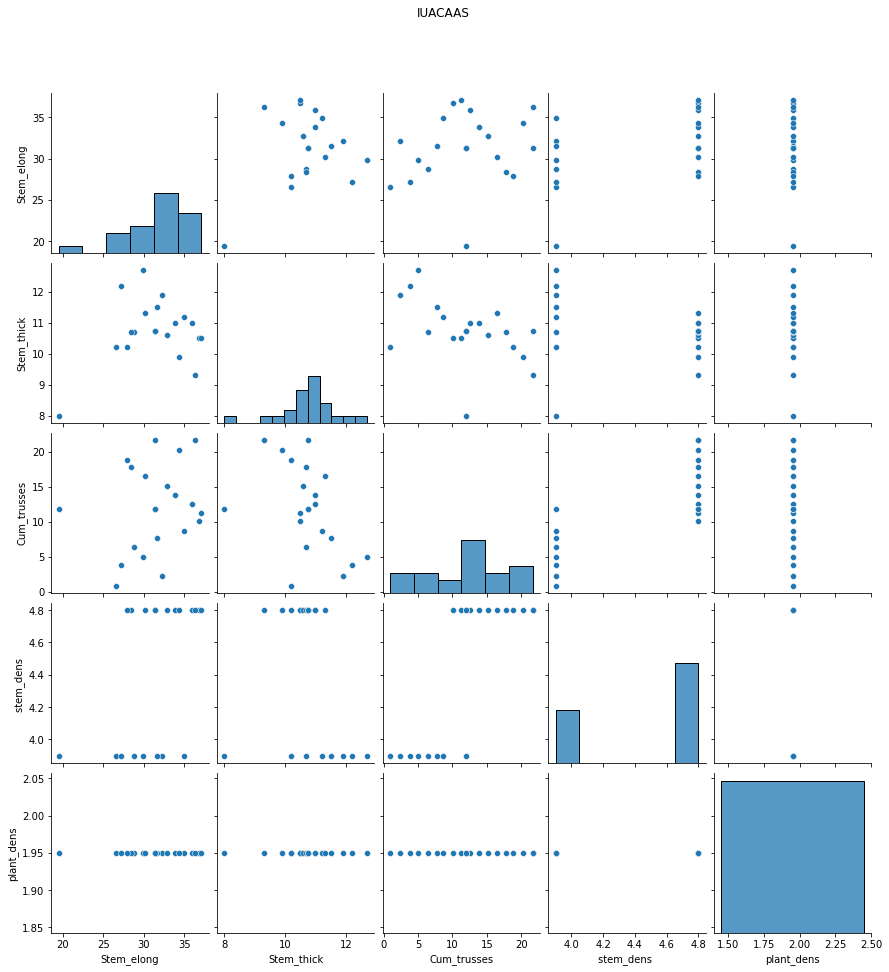

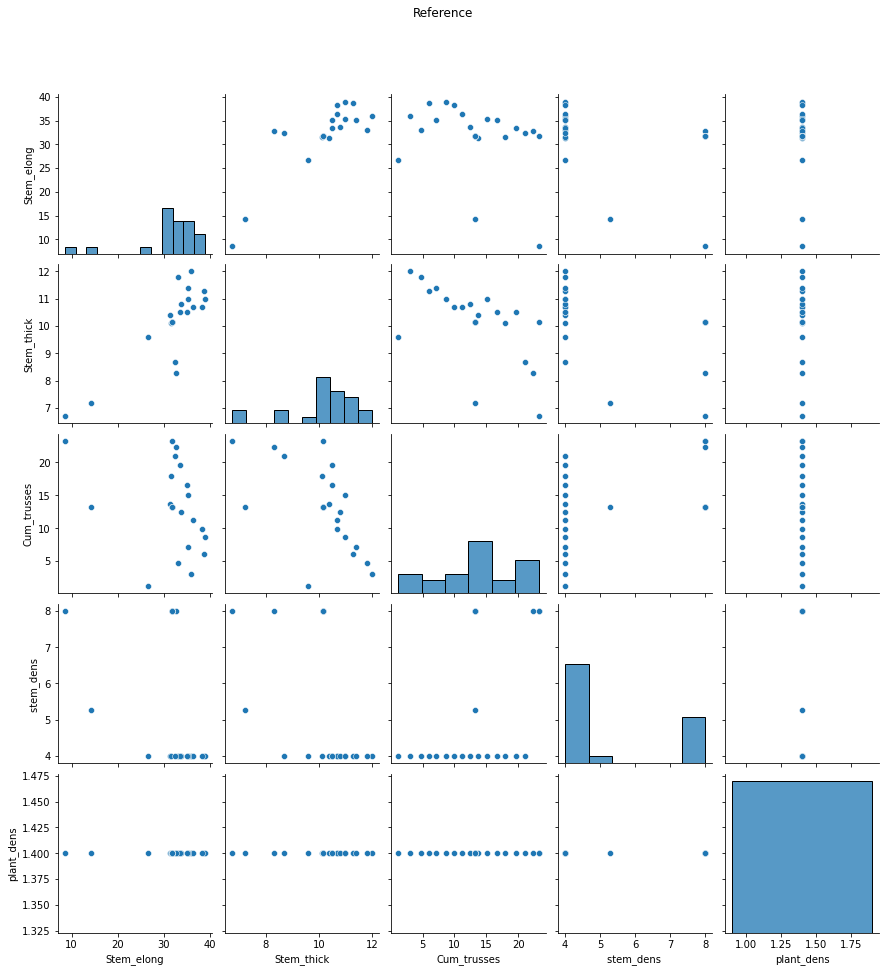

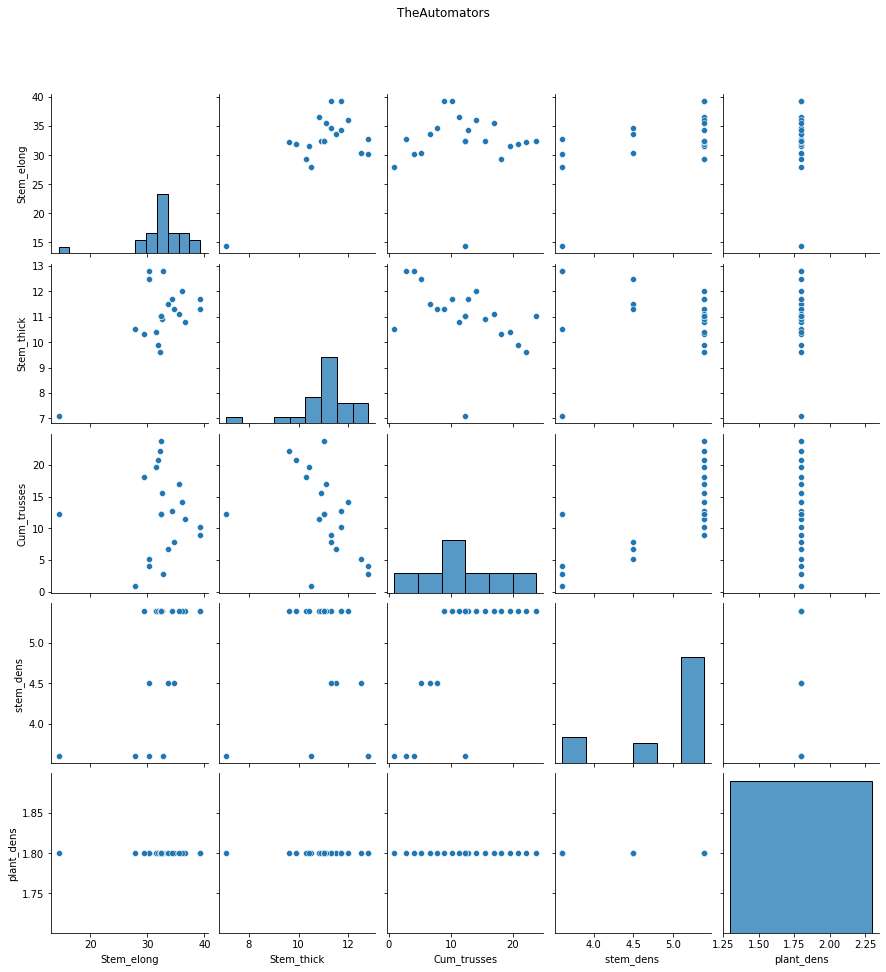

In [16]:
plt.figure(figsize=(6,6))
for j in df:
    g = sns.pairplot(df[j])
    g.fig.suptitle("{}".format(j), y=1.08) # y= some height>1

plt.show()

<Figure size 720x432 with 0 Axes>

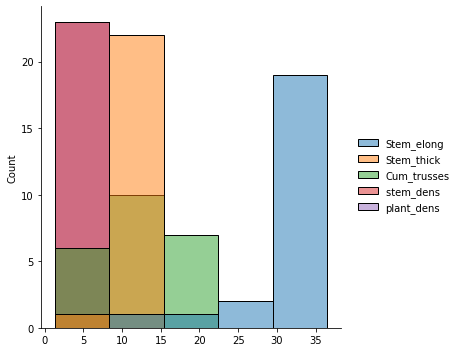

<Figure size 720x432 with 0 Axes>

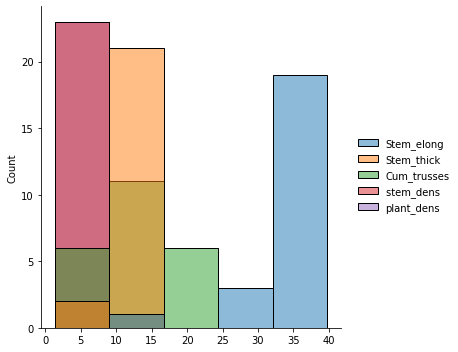

<Figure size 720x432 with 0 Axes>

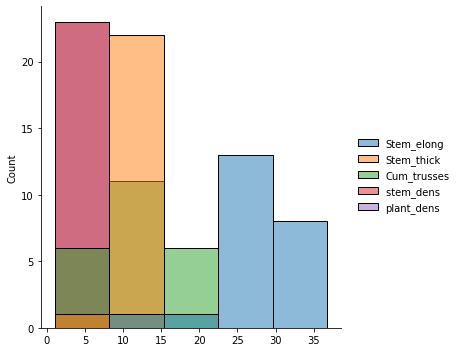

<Figure size 720x432 with 0 Axes>

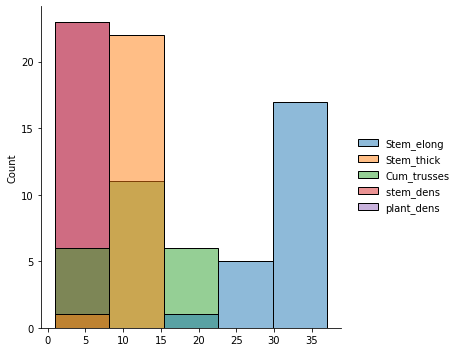

<Figure size 720x432 with 0 Axes>

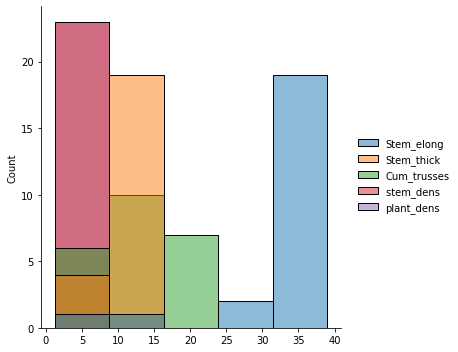

<Figure size 720x432 with 0 Axes>

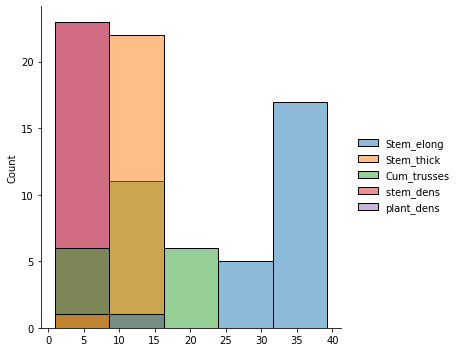

In [17]:
for i in df:
    plt.figure(figsize=(10,6))
    sns.displot(df[i],bins=5)

In [18]:
def plot(target):
    
    k=0
    sns.set()
    plt.figure(figsize=(20, 60),facecolor='lightgray')

    for j in col:
        plt.subplot(6, 1, k + 1)
        for i in df:
            plt.plot(df[i][target], df[i][j])
        plt.legend(files)
        plt.title("{var} vs {target}".format(var=j,target=target))
        plt.xlabel(j)
        plt.ylabel(target)
        k=k+1
    plt.show()
        
    

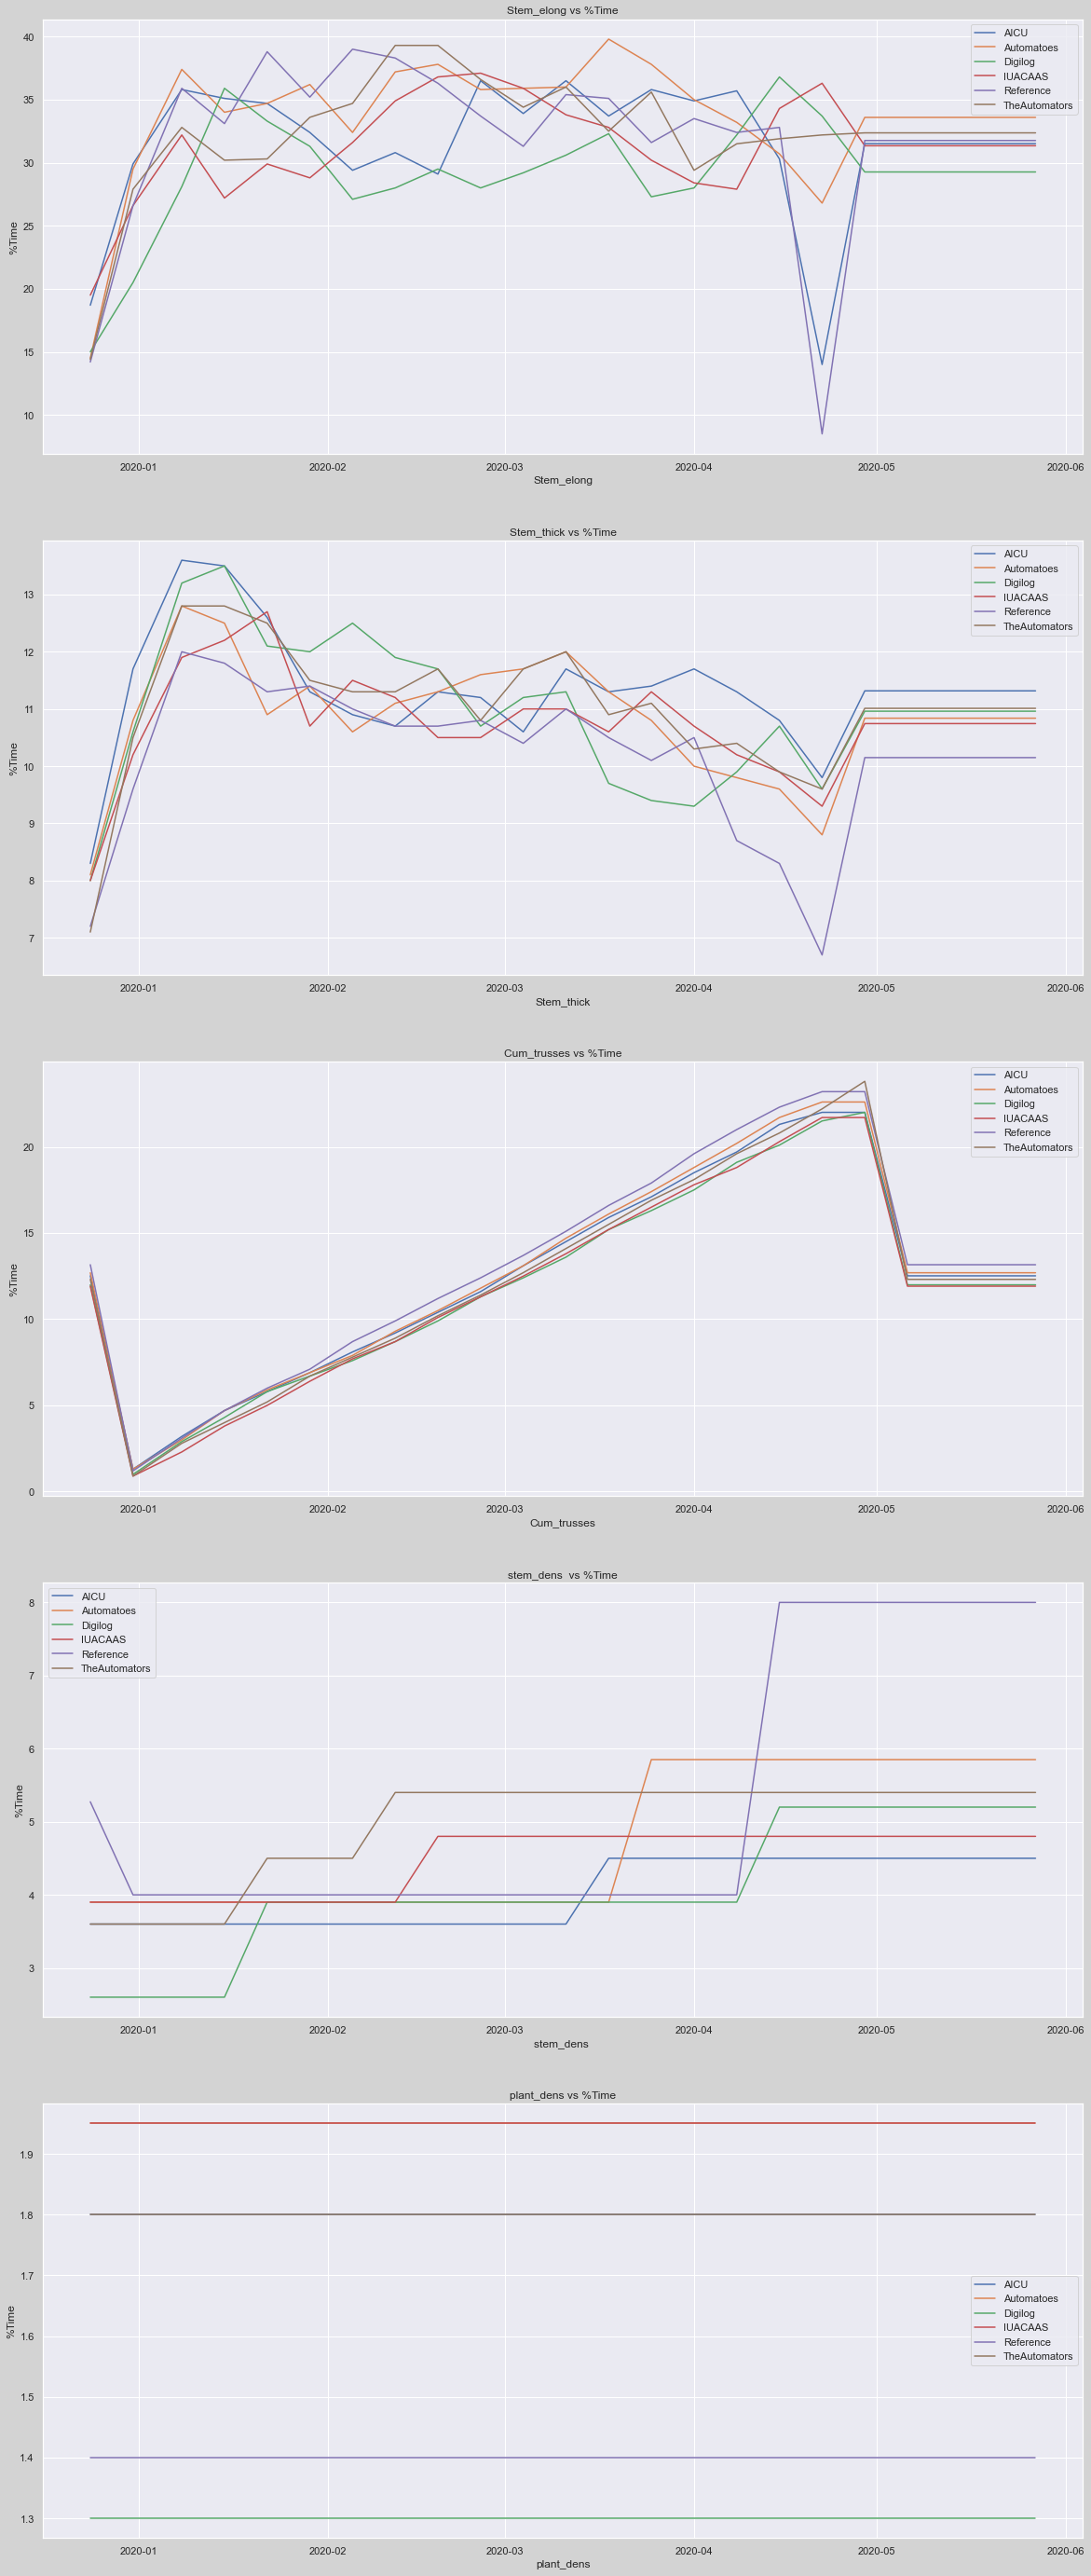

In [19]:
plot("%Time")